In [144]:
import pandas as pd
import os
from scipy import stats
import numpy as np

In [145]:
reviews = pd.read_csv("insideairbnb//reviews.csv")
reviews.head()

,listing_id,date
0,269467,2018-01-01
1,18674,2013-05-27
2,269467,2018-03-30
3,269467,2018-04-04
4,18674,2014-03-02


In [146]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')

In [147]:
reviews.set_index('date', inplace=True)

In [148]:
min(monthly_counts.index)

'2010'

In [149]:
monthly_counts = reviews.groupby(pd.Grouper(freq='Y')).size()
monthly_counts.index = monthly_counts.index.strftime('%Y')
# Display the monthly counts
print("\nMonthly Counts:\n", monthly_counts)


Monthly Counts:
 date
2010         4
2011       173
2012       931
2013      4457
2014     13125
2015     25920
2016     43233
2017     59745
2018     77106
2019    105012
2020     29018
2021     60669
2022    154229
2023    199986
2024    108655
dtype: int64


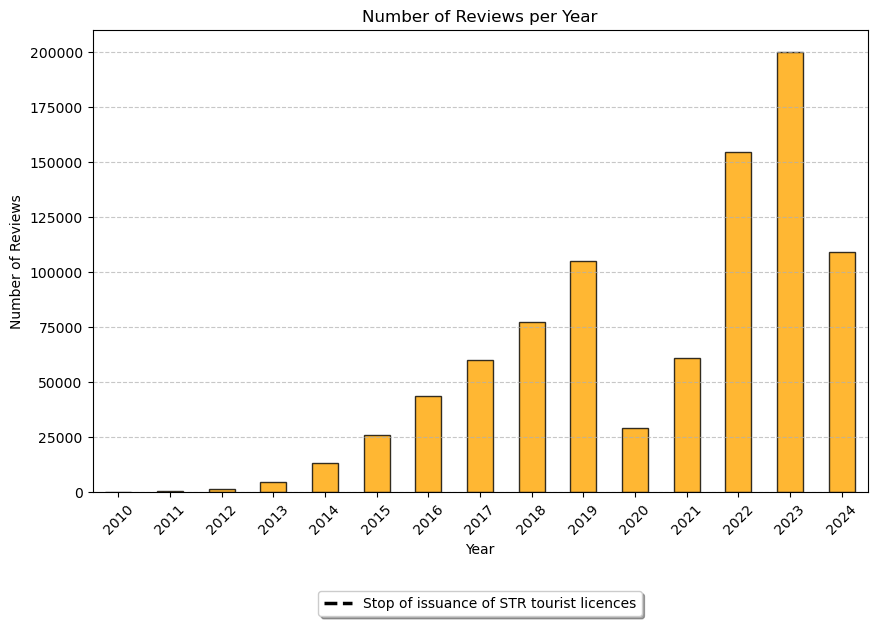

In [150]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='orange', edgecolor='black', alpha=0.8)
plt.title('Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=2014,  linestyle='--', linewidth=2.5, color='black', label='Stop of issuance of STR tourist licences')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

In [151]:
sales = pd.read_excel("Precio medio oferta distritos barcelona.xlsx", header=0)

In [152]:
sales = sales.rename(columns={'Distritos': 'Distretto', 'Años\xa0\xa0\xa0\xa0\xa0\xa0\xa0': 'Anno', '1r trimestre\xa0\xa0': 'Trimestre 1', '2º trimestre\xa0\xa0': 'Trimestre 2', '3º trimestre\xa0\xa0': 'Trimestre 3', '4º trimestre\xa0\xa0': 'Trimestre 4'})
sales.head()

,Distretto,Anno,Trimestre 1,Trimestre 2,Trimestre 3,Trimestre 4
0,BARCELONA,2001,-,2.010,2.085,2.115
1,1. Ciutat Vella,2001,-,1.761,1.797,1.947
2,2. Eixample,2001,-,1.907,2.331,2.448
3,3. Sants-Montjuïc,2001,-,1.931,1.886,1.867
4,4. Les Corts,2001,-,2.281,2.522,2.842


In [153]:
for col in sales.columns:
  sales[col] = sales[col].str.strip()
  if col!='Distretto':
    sales[col] = sales[col].str.replace('.', '', regex=False)
    sales[col] = pd.to_numeric(sales[col], errors='ignore')

In [154]:
sales = sales[sales['Anno'] > 2010]
sales.head()

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
sales['Trimestre 1'] = pd.to_numeric(sales['Trimestre 1'])

In [ ]:
type(sales['Trimestre 1'][110])

numpy.int64

In [ ]:
sales['Media annuale'] = (sales['Trimestre 1'] + sales['Trimestre 2'] + sales['Trimestre 3'] + sales['Trimestre 4']) / 4
sales.head(15)

,Distretto,Anno,Trimestre 1,Trimestre 2,Trimestre 3,Trimestre 4,Media annuale
110,BARCELONA,2011,3782,3632,3533,3434,3595.25
111,1. Ciutat Vella,2011,3440,3197,3083,2981,3175.25
112,2. Eixample,2011,4057,3923,3806,3696,3870.50
113,3. Sants-Montjuïc,2011,3085,2998,2877,2767,2931.75
114,4. Les Corts,2011,4746,4523,4356,4298,4480.75
115,5. Sarrià-Sant Gervasi,2011,4773,4629,4459,4321,4545.50
116,6. Gràcia,2011,3750,3574,3462,3375,3540.25
117,7. Horta-Guinardó,2011,3003,2876,2827,2700,2851.50
118,8. Nou Barris,2011,2650,2527,2505,2356,2509.50
119,9. Sant Andreu,2011,2911,2820,2704,2590,2756.25


In [ ]:
agg_sales = sales[sales['Distretto']=='BARCELONA']
agg_sales

,Distretto,Anno,Trimestre 1,Trimestre 2,Trimestre 3,Trimestre 4,Media annuale
110,BARCELONA,2011,3782,3632,3533,3434,3595.25
121,BARCELONA,2012,3332,3260,3202,3114,3227.00
132,BARCELONA,2013,3045,3035,2957,3019,3014.00
143,BARCELONA,2014,3067,3100,3116,3188,3117.75
154,BARCELONA,2015,3263,3293,3401,3392,3337.25
165,BARCELONA,2016,3478,3533,3667,3879,3639.25
176,BARCELONA,2017,4123,4253,4335,4284,4248.75
187,BARCELONA,2018,4334,4400,4388,4344,4366.50
198,BARCELONA,2019,4217,4206,4205,4115,4185.75
209,BARCELONA,2020,4111,4163,4083,4009,4091.50


In [ ]:
before_2017 = agg_sales[agg_sales['Anno'] <= 2017]
after_2017 = agg_sales[agg_sales['Anno'] >= 2017]

# Fit linear regression models
slope_before, intercept_before, r_value, p_value, std_err = stats.linregress(before_2017['Anno'], before_2017['Media annuale'])
slope_after, intercept_after, r_value, p_value, std_err = stats.linregress(after_2017['Anno'], after_2017['Media annuale'])
agg_sales['3-year MA'] = agg_sales['Media annuale'].rolling(window=3).mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_1380\2900449980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_rents['3-year MA'] = agg_rents['Media annuale'].rolling(window=3).mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_1380\892540495.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(before_2017['Anno'], intercept_before + slope_before*before_2017['Anno'], 'g-', label='Trend before 2017', linestyle='--')
C:\Users\danie\AppData\Local\Temp\ipykernel_1380\892540495.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(after_2017['Anno'], intercept_after + slope_after*after_2017['Anno'], 'r-', label='Trend after 2017', linestyle='--')


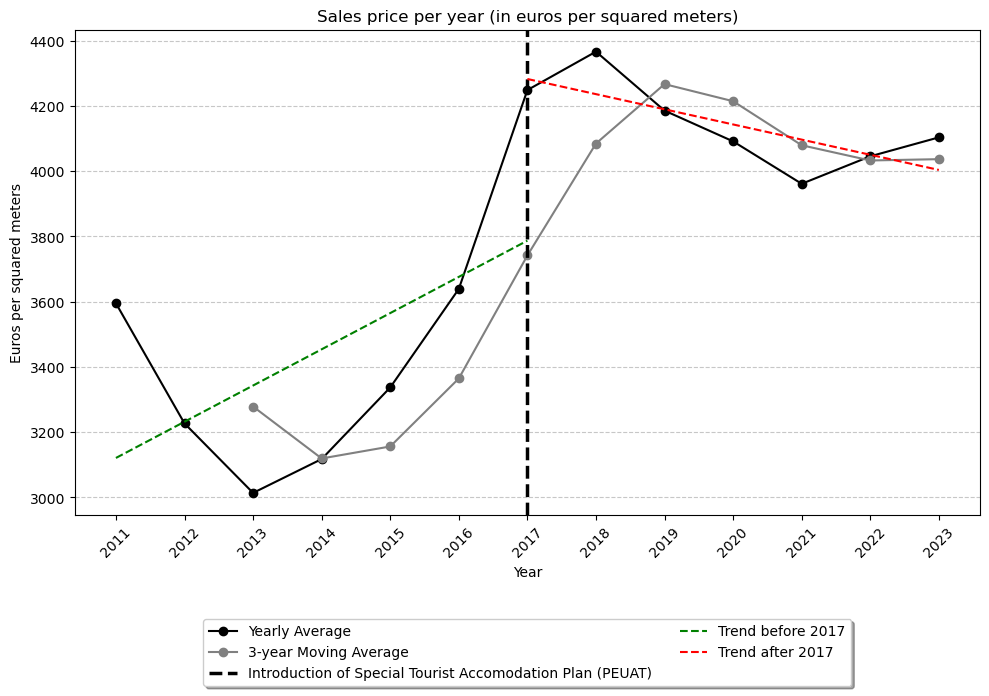

In [89]:
plt.figure(figsize=(10, 6))
# plt.bar(agg_rents['Anno'], agg_rents['Media annuale'], color='skyblue', edgecolor='black')
plt.plot(agg_sales['Anno'], agg_sales['Media annuale'], color='black', linestyle='-', marker='o', label='Yearly Average')
plt.plot(agg_sales['Anno'], agg_sales['3-year MA'], color='grey', linestyle='-', marker='o', label='3-year Moving Average')
plt.title('Barcelona sales price per year (in euros per squared meters)')
plt.xlabel('Year')
plt.ylabel('Euros per squared meters')
plt.xticks(agg_sales['Anno'], rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=2017,  linestyle='--', linewidth=2.5, color='black', label='Introduction of Special Tourist Accomodation Plan (PEUAT)')
plt.plot(before_2017['Anno'], intercept_before + slope_before*before_2017['Anno'], 'g-', label='Trend before 2017', linestyle='--')
plt.plot(after_2017['Anno'], intercept_after + slope_after*after_2017['Anno'], 'r-', label='Trend after 2017', linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

In [167]:
rental = pd.read_csv("Barcelona_rent_price.csv")
rental['District'].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuic', 'Les Corts',
       'Sarria-Sant Gervasi', 'Gracia', 'Horta-Guinardo', 'Nou Barris',
       'Sant Andreu', 'Sant Marti'], dtype=object)

In [168]:
rental['Price'].describe()

count    4622.000000
mean      416.457594
std       442.872305
min         3.180000
25%        12.100000
50%        81.820000
75%       777.207500
max      2034.000000
Name: Price, dtype: float64

In [169]:
rental.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


In [170]:
rental = rental[rental['Average _rent']=='average rent per surface (euro/m2)']

In [178]:
rental = rental.groupby('Year').mean('Price')

In [183]:
rental = rental.reset_index()
rental

,Year,Trimester,Price,3-year MA
0,2014,2.490842,9.726777,9.728155
1,2015,2.507246,10.453043,10.450459
2,2016,2.489130,11.494239,11.492343
3,2017,2.498168,12.638059,12.634713
4,2018,2.503704,12.819444,12.814753
5,2019,2.505576,13.374349,13.375081
6,2020,2.490706,13.321190,13.320942
7,2021,2.503704,12.720741,12.721605
8,2022,1.503704,13.354815,13.353827


In [184]:
before_2017_rent = rental[rental['Year'] <= 2017]
after_2017_rent = rental[rental['Year'] >= 2017]

# Fit linear regression models
slope_before_rent, intercept_before_rent, r_value_rent, p_value_rent, std_err_rent = stats.linregress(before_2017_rent['Year'], before_2017_rent['Price'])
slope_after_rent, intercept_after_rent, r_value_rent, p_value_rent, std_err_rent = stats.linregress(after_2017_rent['Year'], after_2017_rent['Price'])
rental['3-year MA'] = rental['Price'].rolling(window=3).mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_1380\2228061140.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(before_2017_rent['Year'], intercept_before_rent + slope_before_rent*before_2017_rent['Year'], 'g-', label='Trend before 2017', linestyle='--')
C:\Users\danie\AppData\Local\Temp\ipykernel_1380\2228061140.py:13: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(after_2017_rent['Year'], intercept_after_rent + slope_after_rent*after_2017_rent['Year'], 'r-', label='Trend after 2017', linestyle='--')


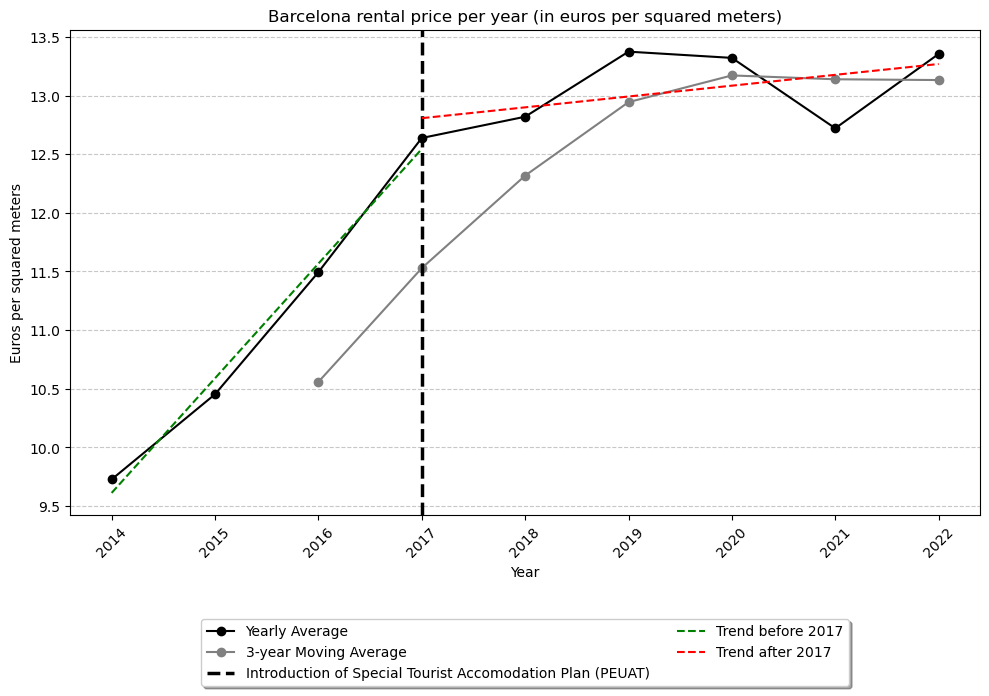

In [191]:
plt.figure(figsize=(10, 6))
# plt.bar(agg_rents['Anno'], agg_rents['Media annuale'], color='skyblue', edgecolor='black')
plt.plot(rental['Year'], rental['Price'], color='black', linestyle='-', marker='o', label='Yearly Average')
plt.plot(rental['Year'], rental['3-year MA'], color='grey', linestyle='-', marker='o', label='3-year Moving Average')
plt.title('Barcelona rental price per year (in euros per squared meters)')
plt.xlabel('Year')
plt.ylabel('Euros per squared meters')
plt.xticks(rental['Year'], rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=2017,  linestyle='--', linewidth=2.5, color='black', label='Introduction of Special Tourist Accomodation Plan (PEUAT)')
plt.plot(before_2017_rent['Year'], intercept_before_rent + slope_before_rent*before_2017_rent['Year'], 'g-', label='Trend before 2017', linestyle='--')
plt.plot(after_2017_rent['Year'], intercept_after_rent + slope_after_rent*after_2017_rent['Year'], 'r-', label='Trend after 2017', linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
plt.show()

In [189]:
print(f'The slope of the trend for the rental prices after the PEUAT measure is {slope_after_rent:.3f}')
print(f'The slope of the trend for the rental prices before the PEUAT measure is {slope_before_rent:.3f}')

The slope of the trend for the rental prices after the PEUAT measure is 0.092
The slope of the trend for the rental prices before the PEUAT measure is 0.978


In [187]:
print(f"The ratio for the rental prices between the trend after the PEUAT measure and the trend before is: {(slope_after_rent / slope_before_rent):.3f}")

The ratio for the rental prices between the trend after the PEUAT measure and the trend before is: 0.095


In [190]:
print(f'The slope of the trend for the sales prices after the PEUAT measure is {slope_after:.3f}')
print(f'The slope of the trend for the sales prices before the PEUAT measure is {slope_before:.3f}')

The slope of the trend for the sales prices after the PEUAT measure is -46.455
The slope of the trend for the sales prices before the PEUAT measure is 111.009


In [188]:
print(f"The ratio for the sales prices between the trend after the PEUAT measure and the trend before is: {(slope_after / slope_before):.3f}")

The ratio for the sales prices between the trend after the PEUAT measure and the trend before is: -0.418


There is greater impact of the PEUAT measure on the sales price than on the rental price.